<a href="https://colab.research.google.com/github/vupadhyayula8/cs595/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`CS595 - Termination Project - Twitter Sentiment Analysis`

---



---



In [99]:
import numpy as np
import pandas as pd

In [100]:
# data = pd.read_csv('/Sentiment.csv')
data = pd.read_csv('twitter_training.csv')

In [101]:
len(data)

74682

In [102]:
data.head(100)

,ID,Borderlands,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
95,2416,Borderlands,Neutral,I hate that this easy horrible modifier event ...
96,2417,Borderlands,Negative,Grounded almost looked pretty cool even despit...
97,2417,Borderlands,Negative,Grounded looked cool despite the borderline un...
98,2417,Borderlands,Negative,"Grosskreutz looked pretty cool, even despite t..."


In [103]:
data.isnull().sum()

ID               0
Borderlands      0
Sentiment        0
text           686
dtype: int64

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [105]:
def display_wordcloud(data):
  data['text'] = data['text'].astype(str)
  text = ''.join(data['text'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

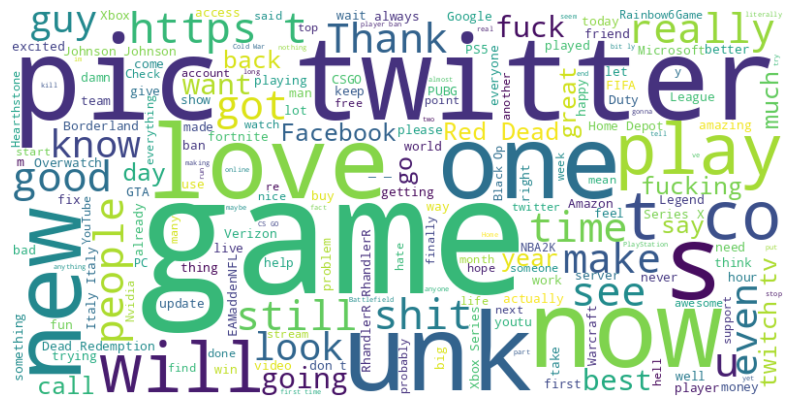

In [106]:
display_wordcloud(data)

In [107]:
positive_data = data[data['Sentiment'] == "Positive"]
negative_data = data[data['Sentiment'] == "Negative"]
neutral_data = data[data['Sentiment'] == "Neutral"]

<ipython-input-105-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


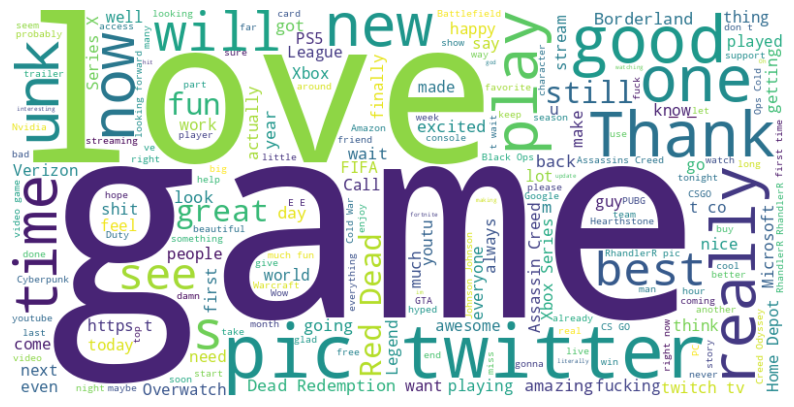

In [108]:
display_wordcloud(positive_data)

<ipython-input-105-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


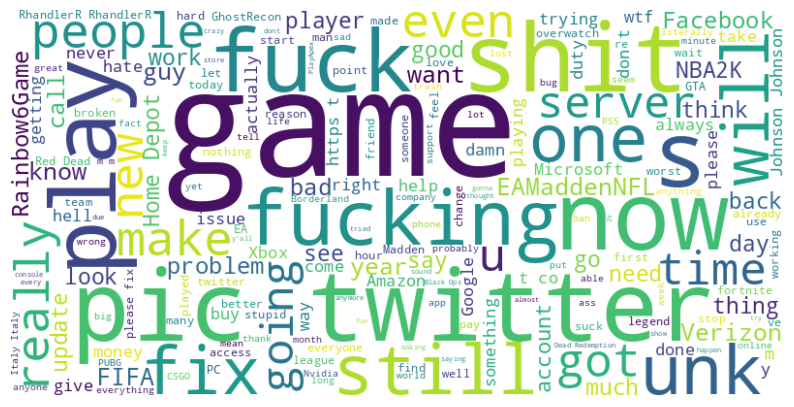

In [109]:
display_wordcloud(negative_data)

<ipython-input-105-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


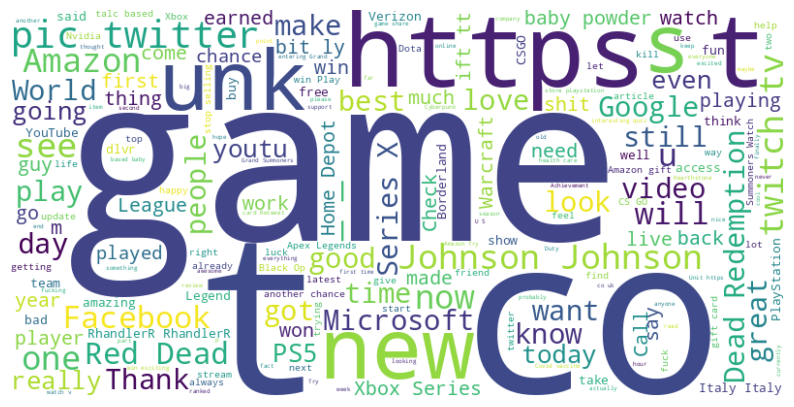

In [110]:
display_wordcloud(neutral_data)

Based on the above wordcloud plots it is to infer that larger words correspond to higher frequency of occurence.

In [111]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
#Removing stopwords from 'text'
STOPWORDS = set(stopwords.words("english"))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head(10)

0                      im getting borderlands murder ,
1                         I coming borders I kill all,
2                     im getting borderlands kill all,
3                    im coming borderlands murder all,
4                 im getting borderlands 2 murder all,
5                   im getting borderlands murder all,
6    So I spent hours making something fun. . . If ...
7    So I spent couple hours something fun... If kn...
8    So I spent hours something fun... If know I'm ...
9    So I spent hours making something fun. . . If ...
Name: text, dtype: object

In [113]:
#Cleaning and removing punctuation
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

74677    Just realized Windows partition Mac like 6 yea...
74678    Just realized Mac window partition 6 years beh...
74679    Just realized windows partition Mac 6 years be...
74680    Just realized windows partition Mac like 6 yea...
74681    Just like windows partition Mac like 6 years b...
Name: text, dtype: object

In [114]:
#Removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

74677    Just realized Windows partition Mac like 6 yea...
74678    Just realized Mac window partition 6 years beh...
74679    Just realized windows partition Mac 6 years be...
74680    Just realized windows partition Mac like 6 yea...
74681    Just like windows partition Mac like 6 years b...
Name: text, dtype: object

In [115]:
#Removing URLS
import re
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

74677    Just realized Windows partition Mac like 6 yea...
74678    Just realized Mac window partition 6 years beh...
74679    Just realized windows partition Mac 6 years be...
74680    Just realized windows partition Mac like 6 yea...
74681    Just like windows partition Mac like 6 years b...
Name: text, dtype: object

In [116]:
#Removing numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail(40)

74642       I remembered I switched AMD Nvidia  months ago
74643    Checked new GPU drivers today typed AMD driver...
74644    Checked new GPU powered drivers today went AMD...
74645    Checked new GPU drivers today clicked AMD driv...
74646    NVIDIA released security update drivers fixing...
74647    NVIDIA released security update drivers fixes ...
74648    NVIDIA released security update drivers fixes ...
74649    NVIDIA released another software update driver...
74650    NVIDIA released new security update drivers fi...
74651    NVIDIA released substantial update drivers ide...
74652    Cheap mean better btw   techsallcomgooglechall...
74653     Cheap mean better way techsallcom  googlechallen
74654                                                     
74655       Cheap mean betterunk techsallcomgooglechallen…
74656     Cheap mean anyone better btw techsall com  go...
74657              really look bad btw netcomgooglechallen
74658    Nvidia doesn’t want give  ‘crypto craze’ docs .

In [117]:
#preProcessing the data
tweets = []
for index, row in data.iterrows():
    filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_without_stopwords = [word for word in filtered]
    tweets.append((words_without_stopwords, row.Sentiment))

In [118]:
#Word extraction function
def take_words_from_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [119]:
#Defining a function to get word features
def word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

In [120]:
words_feature = word_features(take_words_from_tweets(tweets))
words_feature

dict_keys(['getting', 'borderlands', 'murder', 'coming', 'borders', 'kill', 'all', 'spent', 'hours', 'making', 'something', 'fun', 'know', 'huge', 'fan', 'maya', 'one', 'favorite', 'characters', 'decided', 'make', 'wallpaper', 'here', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'pictwittercommlsiwfjg', 'couple', 'heres', 'picture', 'compared', 'have', 'pictwittercom', 'mlsiwfjg', 'rhandlerr', 'rockhard', 'varlope', 'rare', 'powerful', 'handsome', 'jackpot', 'xbox', 'dlvritrmtrgf', 'dlvrit', 'rmtrgf', 'dfrit', 'vita', 'but', 'live', 'rock', 'hard', 'music', 'sega', 'dlvr', 'from', 'ihard', 'like', 'london', 'first', 'session', 'long', 'time', 'actually', 'really', 'satisfying', 'combat', 'experience', 'got', 'good', 'kills', 'fighting', 'enjoyed', 'rather', 'real', 'nice', 'wait', 'hot', 'row', 'bad', 'biggest', 'dissappoinment', 'life', 'came', 'year', 'ago', 'fuck', 'the', 'disappointment', 'for', 'male', 'hanging', 'back', 'last', 'finished', 'finally', 'yas', 'thank'

In [121]:
#Defining function to extract the features from the documents
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in words_feature:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [122]:
#Tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the text using word_tokenize
data['text'] = data['text'].apply(lambda x: word_tokenize(str(x)))

print(data['text'].head(50))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                    [im, getting, borderlands, murder]
1                    [I, coming, borders, I, kill, all]
2                 [im, getting, borderlands, kill, all]
3                [im, coming, borderlands, murder, all]
4               [im, getting, borderlands, murder, all]
5               [im, getting, borderlands, murder, all]
6     [So, I, spent, hours, making, something, fun, ...
7     [So, I, spent, couple, hours, something, fun, ...
8     [So, I, spent, hours, something, fun, If, know...
9     [So, I, spent, hours, making, something, fun, ...
10    [So, I, spent, hours, making, something, fun, ...
11                                                   []
12    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
13    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
14    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
15    [RockHard, La, Vita, RARE, BUT, POWERFUL, HAND...
16    [Live, Rock, Hard, music, La, la, Varlope, RAR...
17    [IHard, like, me, RARE, LONDON, DE, HANDSO

In [126]:
#Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0         [im, getting, borderlands, murder]
1         [I, coming, borders, I, kill, all]
2      [im, getting, borderlands, kill, all]
3     [im, coming, borderlands, murder, all]
4    [im, getting, borderlands, murder, all]
Name: text, dtype: object

In [129]:
#Lemmatization
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head(50)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                    [im, getting, borderlands, murder]
1                    [I, coming, borders, I, kill, all]
2                 [im, getting, borderlands, kill, all]
3                [im, coming, borderlands, murder, all]
4               [im, getting, borderlands, murder, all]
5               [im, getting, borderlands, murder, all]
6     [So, I, spent, hours, making, something, fun, ...
7     [So, I, spent, couple, hours, something, fun, ...
8     [So, I, spent, hours, something, fun, If, know...
9     [So, I, spent, hours, making, something, fun, ...
10    [So, I, spent, hours, making, something, fun, ...
11                                                   []
12    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
13    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
14    [RockHard, La, Varlope, RARE, POWERFUL, HANDSO...
15    [RockHard, La, Vita, RARE, BUT, POWERFUL, HAND...
16    [Live, Rock, Hard, music, La, la, Varlope, RAR...
17    [IHard, like, me, RARE, LONDON, DE, HANDSO

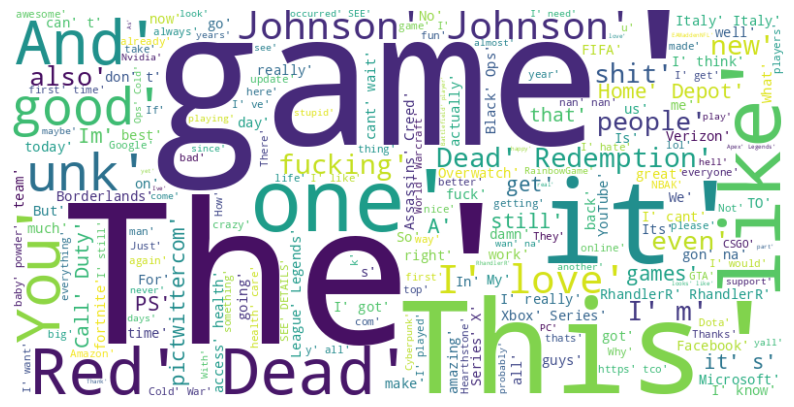

In [130]:
#wordcloud after data cleaning, stemming and lemmatization
display_wordcloud(data)

In [123]:
#Split the data into train and test datasets
train, test = train_test_split(data, test_size = 0.3)

In [124]:
#Diving the positive and negative datas from dataset
test_positive = test[ test['Sentiment'] == 'Positive']
test_positive = test_positive['text']
test_negative = test[ test['Sentiment'] == 'Negative']
test_negative = test_negative['text']